In [1]:
!sudo apt install tesseract-ocr
!sudo apt-get install poppler-utils
!pip install pillow
!pip install pytesseract
!pip install imutils
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,335 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
import cv2
import os
from pytesseract import Output
import pytesseract
import numpy
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow
import pandas as pd

In [3]:
images = convert_from_path('magazine.pdf')
imgs = []
for i in images:
  imgs.append(numpy.array(i))

In [4]:
results = []
for i in imgs:
  results.append(pytesseract.image_to_data(i, output_type=Output.DICT))

In [5]:
min_conf = 90    # confidence threshold that can be tuned

In [6]:
outputs = []

In [7]:
# loop over all bounding boxes in all the pages
j = 0
texts = []
for result in results:
  img_texts = []
  bb = 1
  for i in range(0, len(result["text"])):
    # extract the bounding box coordinates of the top left point along with the height and width
    x = result["left"][i]
    y = result["top"][i]
    w = result["width"][i]
    h = result["height"][i]

    # extract the text and confidence score
    text = result["text"][i]
    conf = int(result["conf"][i])
    #print(text,conf)
    #if the confidence score exceeds the confidence threshold then mark the bounding box and append the text
    if conf > min_conf:
      cv2.rectangle(imgs[j], (x, y), (x + w, y + h), (0, 255, 0), 1)
      cv2.putText(imgs[j], str(bb), (x, y - 2), cv2.FONT_HERSHEY_SIMPLEX,
			0.3, (0, 0, 255), 1)           #control font, font size, color and line thickness
      img_texts.append([bb,text])
      bb+=1
  outputs.append(imgs[j])
  texts.append(pd.DataFrame(img_texts, columns = ['Sr. No.', 'Text']))
  j+=1

In [8]:
os.mkdir('images')
os.mkdir('texts')

In [9]:
x = 1
y = 1
for df in texts:
  df.to_csv('texts/'+str(y)+'.csv')
  y+=1
for image in outputs:
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.imwrite('images/'+str(x)+'.jpg',img)
  x+=1


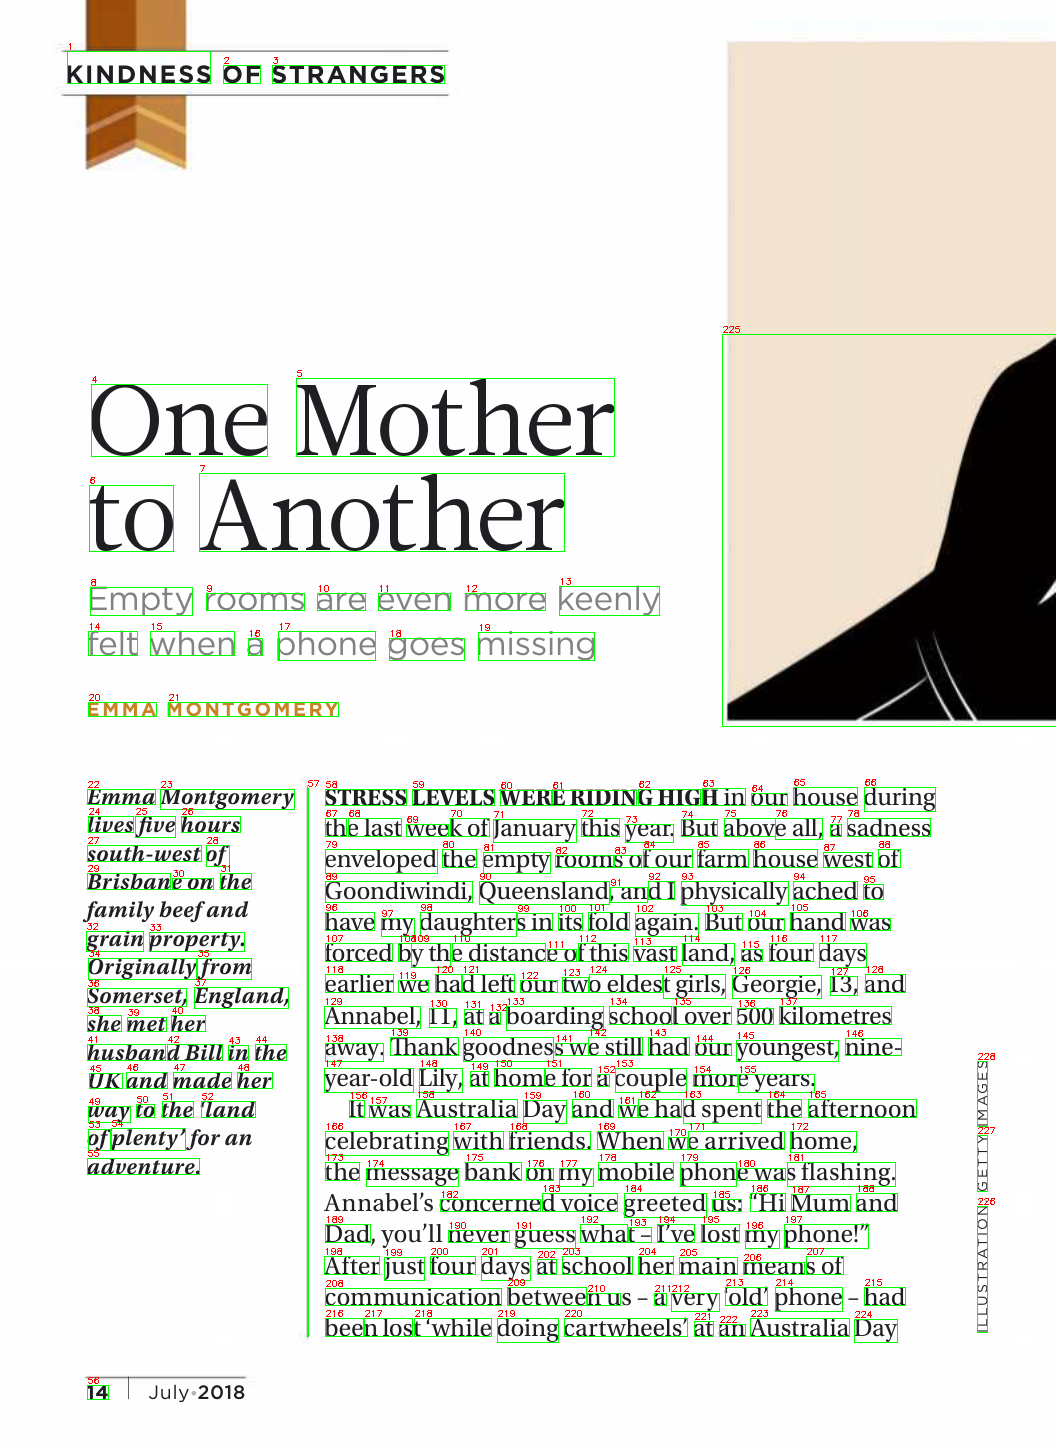

In [10]:
cv2_imshow(outputs[15])

In [11]:
texts[15]

,Sr. No.,Text
0,1,KINDNESS
1,2,OF
2,3,STRANGERS
3,4,One
4,5,Mother
...,...,...
223,224,Day
224,225,
225,226,ILLUSTRATION:
226,227,GETTY
